# MNIST

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
some_digit = np.array(X[0:1])
some_digit_image = some_digit.reshape(28, 28)
some_digit_image


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

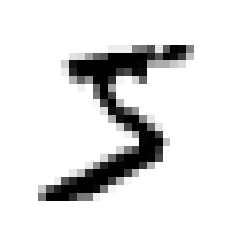

In [14]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [15]:
y[0]
# Note that label is string and we need Numeric data 

'5'

In [16]:
y = y.astype(np.uint8)

In [17]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a binary classifier

In [19]:
# We will first simplify the problem. We will identify one digit- for example number 5. This '5-detector' will be the binary classifier, There are only two classes which are 5 and not-5

y_train_5 = (y_train == 5)
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [20]:
y_test_5 = (y_test == 5)

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
some_digit = np.array(X[0:1])
some_digit.shape

(1, 784)

In [23]:
sgd_clf.predict(some_digit)

array([ True])

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,shuffle=True , random_state=42)
# skfolds

(skfolds.split(X_train, y_train_5))

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # clone_clf = clone(sgd_clf)
    # X_train_folds = X_train[train_index]
    # y_train_folds = y_train_5[train_index]
    # X_test_fold = X_train[test_index]
    # y_test_fold = y_train[test_index]


    # clone_clf.fit(X_train_folds, y_train_folds)
    # y_pred = clone_clf.predict(X_test_fold)
    # n_correct = sum(y_pred == y_test_fold)
    # print(n_correct/ len(y_pred))
    print(X_train)
    print(train_index, test_index)



       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [26]:
from sklearn.base import BaseEstimator

In [27]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)  # 3530 / (3530 + 687)
# so when it claims an image represents a 5, it is only 83.7% correct

0.8370879772350012

In [32]:
3530 / (3530 + 687)

0.8370879772350012

In [33]:
recall_score(y_train_5, y_train_pred) 
# It only detects 65% of the 5s

0.6511713705958311

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [35]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

array([2164.22030239])

In [36]:
threshold = 0
y_some_digit_prep = (y_scores > threshold)

In [37]:
y_some_digit_prep

array([ True])

In [38]:
threshold = 8000
y_some_digit_prep = (y_scores > threshold)
y_some_digit_prep

array([False])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [40]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [41]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

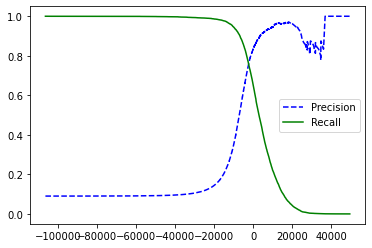

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
# Recall decreases when we increase the threshold after threshold = 0 nearly

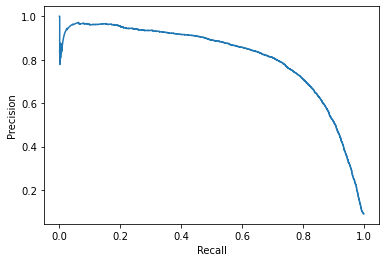

In [43]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143957

In [45]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [46]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [47]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [48]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel('False positie rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

No handles with labels found to put in legend.


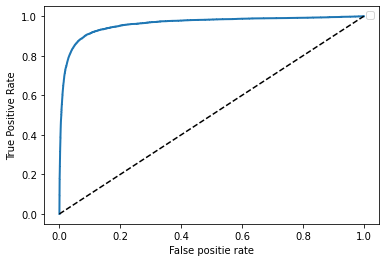

In [51]:
plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [54]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [55]:
y_scores_forest = y_probas_forest[:, 1] #  score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

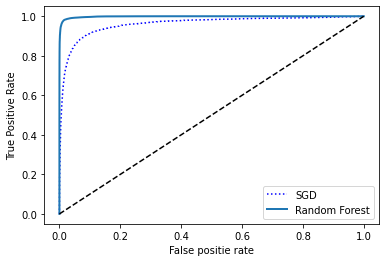

In [56]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [57]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# <u>Multiclass Classification</u>

Binary claassifiers classify two classes, multiclass classifierscan distinguish between more than two classes

Some classifiers capable of handling multiclass
- SGD classifiers
- Random Forest classifiers
- naive Bayes classifiers


Some strictly binary classifiers are:
- Logistic Regression
- Support Vector Machine Classifiers


We can use <u><b>OvR strategy(one-versus-the-rest)</b></u> to use binary classifiers as multiclass classifiers, in this strategy we can use multiple times a single binary classifier. For e.g. we can train 10 binary calssifiers for classifying 10 digits(0-9) , one for each digit(0-detector, 1-detector, .......).


There is also another strategy known as OvO (one-versus-one).

In [58]:
from sklearn.svm import SVC 
svm_clf = SVC()

In [59]:
svm_clf.fit(X_train, y_train)
svm_clf.predict(some_digit)

array([5], dtype=uint8)

In [60]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [61]:
np.argmax(some_digit_scores)

5

In [62]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## we can also directly use OvO or OvR classifiers using Scikit-learn
 

In [63]:
from sklearn.multiclass import OneVsRestClassifier

In [64]:
ovr_clf = OneVsRestClassifier(SVC())

In [65]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [66]:
ovr_clf.predict(some_digit)

array([5], dtype=uint8)

In [67]:
len(ovr_clf.estimators_)

10

In [68]:
ovr_clf.estimators_

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [70]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [71]:
sgd_clf.predict(some_digit)

array([3], dtype=uint8)

In [72]:
sgd_clf.decision_function(some_digit)

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [73]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [74]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

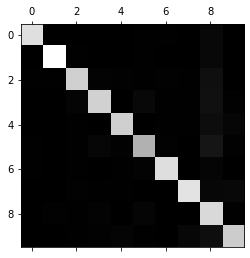

In [76]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [77]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

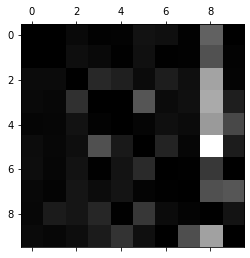

In [78]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [79]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]

In [84]:
def plot_digits(instances, images_per_row=10, **options): 
    size = 28 
    images_per_row = min(len(instances), images_per_row) 
    images = [instance.reshape(size,size) for instance in instances] 
    n_rows = (len(instances) - 1) // images_per_row + 1 
    row_images = [] 
    n_empty = n_rows * images_per_row - len(instances) 
    images.append(np.zeros((size, size * n_empty)))  
    for row in range(n_rows): 
        rimages = images[row * images_per_row : (row + 1) * images_per_row] 
        row_images.append(np.concatenate(rimages, axis=1)) 
    image = np.concatenate(row_images, axis=0) 
    plt.imshow(image, cmap = plt.cm.binary, **options) 
    plt.axis("off") 

AttributeError: 'str' object has no attribute 'reshape'

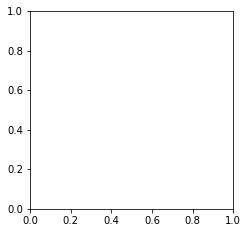

In [85]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

## Multilabel Classification

In [86]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [87]:
knn_clf = KNeighborsClassifier()

In [88]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [89]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [91]:
y_train_large

0        False
1        False
2        False
3        False
4         True
         ...  
59995     True
59996    False
59997    False
59998    False
59999     True
Name: class, Length: 60000, dtype: bool

In [92]:
knn_clf.predict(some_digit)

array([[False,  True]])

In [93]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [94]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Multioutput Classification

In [95]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [96]:
noise

array([[38,  3, 59, ..., 35, 50,  1],
       [12, 26, 33, ..., 55,  5, 83],
       [90, 69, 87, ...,  6, 73, 52],
       ...,
       [24, 74, 57, ..., 36, 85,  3],
       [16,  1, 41, ..., 55, 76, 93],
       [ 9, 35, 12, ..., 36, 70, 35]])

In [97]:
X_train_mod = X_train + noise

In [98]:
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [99]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [100]:
X_test_mod

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,83.0,50.0,34.0,51.0,17.0,75.0,77.0,84.0,61.0,44.0,...,22.0,30.0,5.0,89.0,31.0,60.0,43.0,66.0,53.0,84.0
60001,49.0,47.0,5.0,29.0,41.0,98.0,87.0,22.0,94.0,36.0,...,50.0,83.0,58.0,81.0,29.0,87.0,60.0,66.0,19.0,27.0
60002,79.0,75.0,45.0,26.0,56.0,40.0,29.0,3.0,28.0,68.0,...,11.0,23.0,61.0,96.0,73.0,93.0,13.0,30.0,90.0,33.0
60003,30.0,98.0,30.0,4.0,38.0,16.0,81.0,42.0,12.0,44.0,...,37.0,90.0,8.0,72.0,17.0,74.0,91.0,42.0,46.0,4.0
60004,35.0,44.0,80.0,25.0,70.0,62.0,21.0,64.0,1.0,93.0,...,6.0,69.0,27.0,87.0,30.0,44.0,67.0,87.0,42.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,43.0,12.0,32.0,16.0,54.0,43.0,7.0,68.0,5.0,69.0,...,7.0,87.0,64.0,54.0,55.0,53.0,61.0,18.0,65.0,79.0
69996,48.0,64.0,98.0,47.0,88.0,18.0,53.0,78.0,81.0,63.0,...,38.0,31.0,0.0,2.0,69.0,93.0,19.0,66.0,86.0,68.0
69997,86.0,18.0,11.0,97.0,67.0,8.0,33.0,41.0,95.0,89.0,...,64.0,53.0,39.0,96.0,40.0,35.0,38.0,93.0,54.0,71.0
69998,1.0,71.0,36.0,30.0,32.0,60.0,90.0,39.0,72.0,70.0,...,9.0,57.0,33.0,57.0,10.0,25.0,49.0,42.0,67.0,8.0


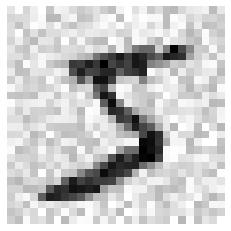

In [120]:
some_index = np.array(X_train_mod[0:1])
some_index = some_index.reshape(28, 28)

plt.imshow(some_index, cmap='binary')
plt.axis("off")
plt.show()

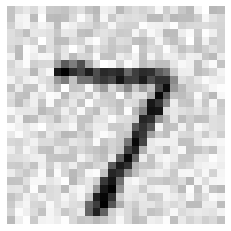

In [130]:
plot_digits(np.array(X_test_mod[0:1]))

In [125]:
clean_digit = knn_clf.predict(np.array(X_test_mod[0:1]))

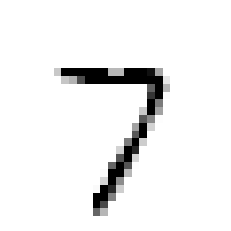

In [127]:
plot_digits(clean_digit)